In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
log_names = ['epoch','seconds','loss','top-1 Acc','top-5 Acc','F1-Score','Precision','Recall']

logs_deit = pd.read_csv('../../networks/birds_deit/logs.csv',sep=';',names=log_names)
logs_levit = pd.read_csv('../../networks/birds_levit/logs.csv',sep=';',names=log_names)
logs_effnet = pd.read_csv('../../networks/birds_effnet/logs.csv',sep=';',names=log_names)

In [3]:

def plot_by_epoch(col):
    plt.plot(logs_deit['epoch'],logs_deit[col])
    plt.plot(logs_levit['epoch'],logs_levit[col])
    plt.plot(logs_effnet['epoch'],logs_effnet[col])
    plt.grid(True)
    plt.legend(['Deit','LeViT','EffNet'])

def plot_by_time(col, offset = True):
    deit_offset = logs_deit['seconds'][0] if offset else 0
    deit_x = logs_deit['seconds'].cumsum() - deit_offset 
    
    levit_offset = logs_levit['seconds'][0]  if offset else 0
    levit_x = logs_levit['seconds'].cumsum() - levit_offset
    
    effnet_offset = logs_effnet['seconds'][0] if offset else 0
    effnet_x = logs_effnet['seconds'].cumsum() - effnet_offset

    
    plt.plot(deit_x ,logs_deit[col])
    plt.plot(levit_x ,logs_levit[col])
    plt.plot(effnet_x ,logs_effnet[col])
    plt.grid(True)
    plt.legend(['Deit','LeViT','EffNet'])

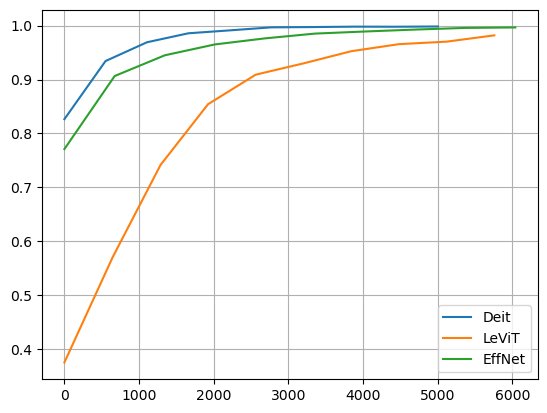

In [13]:
plot_by_time('top-1 Acc',True)

In [10]:
def calculate_median(column):
    print("median")
    print(f"effnet: \t{logs_effnet[column].median()}")
    print(f"levit:  \t{logs_levit[column].median()}")
    print(f"deit:   \t{logs_deit[column].median()}")

In [11]:
calculate_median('seconds')

median
effnet: 	670.6565871238708
levit:  	639.1015104055405
deit:   	554.5802723169327


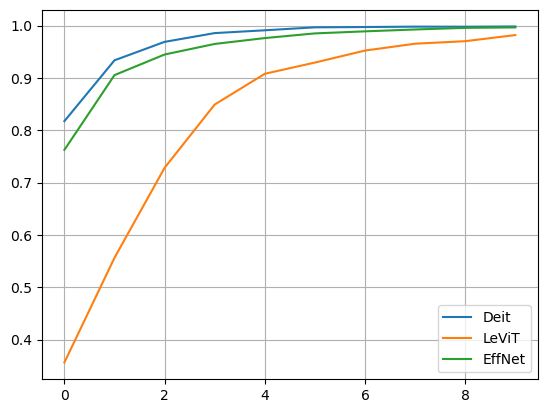

In [16]:
plot_by_epoch('F1-Score')